##Introduction to Regression with Neural Network in TensoFlow

There are many definations for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Imort tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


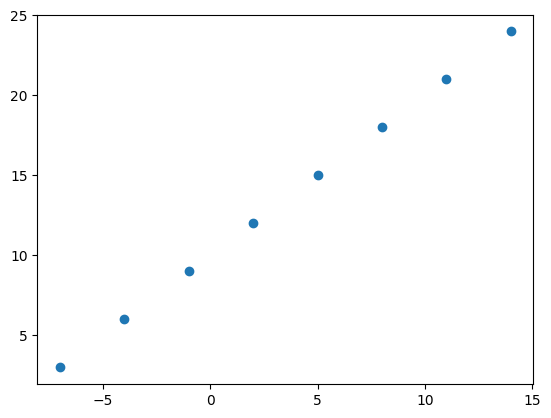

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0,])

# Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Vsualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Creating a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Tur our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as the hidden layers of a deep learning model.
2. Compilling model - define the loss function(in other word, the function which tells our odel how wrong it is) and teh optimizer (tell our model how to improve the pattern its learning) and evaluate metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find pattern between X and y(features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short for mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
             metrics=['mae'])

#3 . Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - loss: 12.8284 - mae: 12.8284
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.6959 - mae: 12.6959
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.5634 - mae: 12.5634
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.4309 - mae: 12.4309
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.2984 - mae: 12.2984


In [ ]:
# Ceck out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make predictiom using model
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[6.286901]], dtype=float32)

In [ ]:
y_pred + 11

array([[17.286901]], dtype=float32)

## Improve our model

We can improve our model. by alternating the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of wach layer.
2. **Compilling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Creating a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - loss: 17.7114 - mae: 17.7114
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 17.4301 - mae: 17.4301
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 17.1489 - mae: 17.1489
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.8676 - mae: 16.8676
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 16.5864 - mae: 16.5864
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 16.3051 - mae: 16.3051
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 16.0239 - mae: 16.0239
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.7426 - mae: 15.7426
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 15.4614 - mae: 15.4614
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15.1801 - mae: 15.1801
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.8989 - mae: 14.8989
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.7038 - mae: 14.7038
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
# Remind ourself of our data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[29.754515]], dtype=float32)

In [ ]:
# Adding a Single hidden layer
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - loss: 13.3102 - mae: 13.3102
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 12.8421 - mae: 12.8421
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.3691 - mae: 12.3691
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.8873 - mae: 11.8873
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.3993 - mae: 11.3993
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.8931 - mae: 10.8931
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.3782 - mae: 10.3782
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.8345 - mae: 9.8345
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.2602 - mae: 9.2602
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.6502 - mae: 8.6502
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.9984 - mae: 7.9984
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.2990 - mae: 7.2990
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


array([[31.328733]], dtype=float32)

In [ ]:
# Changing the optimizer
# Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

# Comiling the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5469 - mae: 13.5469
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.8770 - mae: 12.8770
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 12.2090 - mae: 12.2090
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - loss: 11.5413 - mae: 11.5413
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 10.8723 - mae: 10.8723
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 10.1998 - mae: 10.1998
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 9.5216 - mae: 9.5216
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.8358 - mae: 8.8358
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.1401 - mae: 8.1401
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 7.4316 - mae: 7.4316
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.8062 - mae: 6.8062
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 6.7908 - mae: 6.7908
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

## Evaluating a model

In practice, qa typical workflow you'll go through when building nural network is:

```
build a model -> fit it -> evalaute it -> tweak a model -> fit it -> evaluate it -> tweak it -> evaluate it...
```

When it comes ro evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

It's good idea to visualize:
* The data- what data are we working with? What does it looks like?
* The model itself- what does our model look like?
* The training of a model- how does a model perform while it learns?
* the predictions of the model- how do the predictions of a model line up against the grond truth(the original labels)?

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

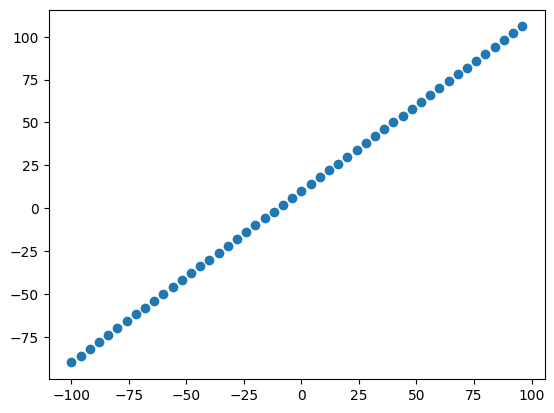

In [ ]:
# Vizualizing the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...
* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test which i has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Checking the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

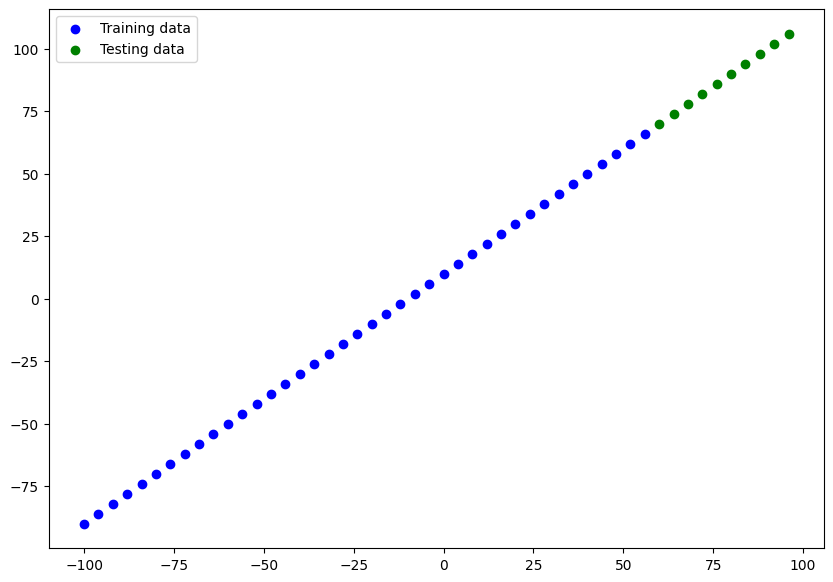

In [ ]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train,y_train, c="b" , label="Training data")
plt.scatter(X_test, y_test, c="g" , label="Testing data")
plt.legend();

In [ ]:
# Let's ceate a neural network for our data

#1 Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3 Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 12.4050 - mae: 12.4050
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.0466 - mae: 9.0466 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9418 - mae: 7.9418
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.4821 - mae: 8.4821
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.6268 - mae: 7.6268
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.5311 - mae: 7.5311
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.6245 - mae: 7.6245
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.0649 - mae: 7.0649
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.3779 - mae: 7.3779
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3465 - mae: 7.3465
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9342 - mae: 6.9342
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8462 - mae: 6.8462
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms

In [ ]:
# Let's create a model which build automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer",activation="relu"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning** )

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=200)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - loss: 36.7782 - mae: 36.7782
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 36.5715 - mae: 36.5715
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 36.3657 - mae: 36.3657
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 36.1602 - mae: 36.1602
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 35.9548 - mae: 35.9548
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 35.7496 - mae: 35.7496
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 35.5446 - mae: 35.5446
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 35.3396 - mae: 35.3396
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 35.1359 - mae: 35.1359
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34.9498 - mae: 34.9498
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 34.7638 - mae: 34.7638
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 34.5781 - mae: 34.5781
Epoch 13/200
2/2 ━━━━━━━

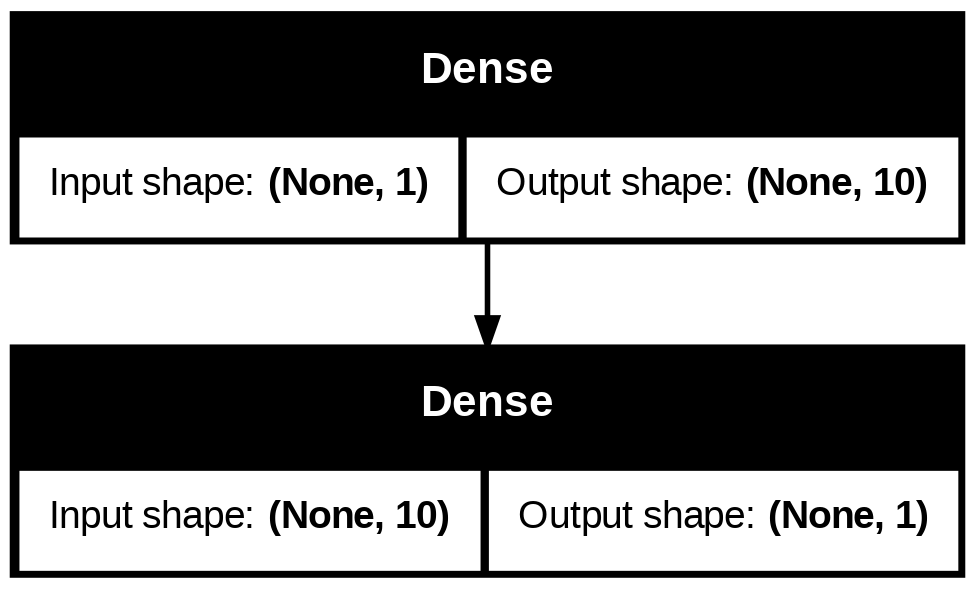

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualize our model's predictions
To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this from of `y_test` or `y_true` versus `y_pred` (ground truth vs model predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[ 76.06436 ],
       [ 81.08368 ],
       [ 86.10299 ],
       [ 91.122314],
       [ 96.141624],
       [101.16094 ],
       [106.18026 ],
       [111.19957 ],
       [116.21888 ],
       [121.2382  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🗝️**Note -** If you feel like you're going to reuse some kind of funtionality in the future, it's a good idea to turn function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label= "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Showing legend
  plt.legend();

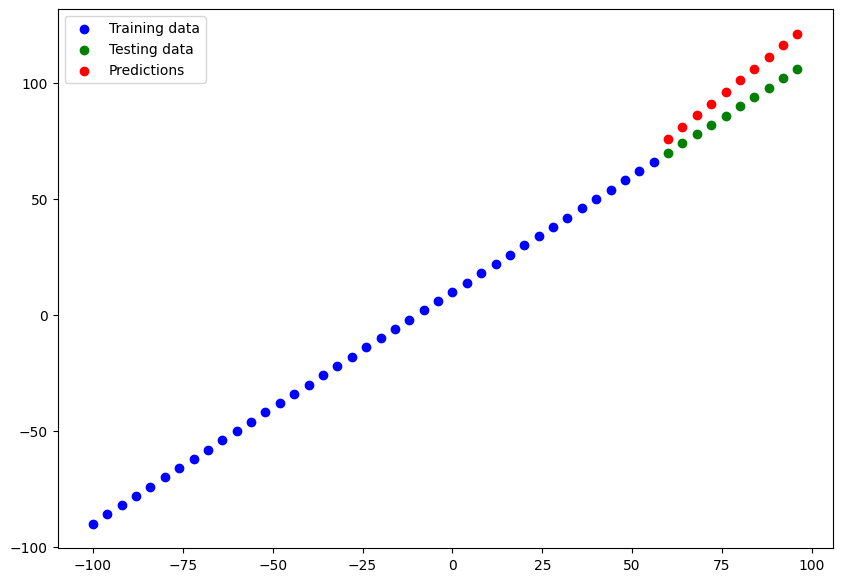

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your odel's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 10.6513 - mae: 10.6513


[10.651281356811523, 10.651281356811523]

In [ ]:
# Calculating the mean absolute error
mae= tf.metrics.MAE(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 6.0643616,  7.083679 ,  8.102989 ,  9.122314 , 10.141624 ,
       11.160942 , 12.18026  , 13.19957  , 14.21888  , 15.238197 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.06436 ],
       [ 81.08368 ],
       [ 86.10299 ],
       [ 91.122314],
       [ 96.141624],
       [101.16094 ],
       [106.18026 ],
       [111.19957 ],
       [116.21888 ],
       [121.2382  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.06436 ,  81.08368 ,  86.10299 ,  91.122314,  96.141624,
       101.16094 , 106.18026 , 111.19957 , 116.21888 , 121.2382  ],
      dtype=float32)>

In [ ]:
# Calculate the Mean absolute error
mae = tf.metrics.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.651281356811523>

In [ ]:
# Calculate the MSE
mse = tf.metrics.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=122.0215835571289>

In [ ]:
# MAke the fuctions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.MAE(y_true= y_true, y_pred =tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.MSE(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Runnig experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it
-> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model ) - this might come in the form of more layer or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patern in the data.

Let's do 3 modelling experiments:

1. `model_1` same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics =["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - loss: 31.6603 - mae: 31.6603
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.8344 - mae: 8.8344
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 10.3031 - mae: 10.3031 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.0877 - mae: 12.0877
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.6428 - mae: 12.6428 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.1807 - mae: 8.1807
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.7258 - mae: 8.7258
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.5926 - mae: 8.5926
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.3589 - mae: 8.3589
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.1050 - mae: 9.1050 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.1735 - mae: 8.1735
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8441 - mae: 8.8441
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


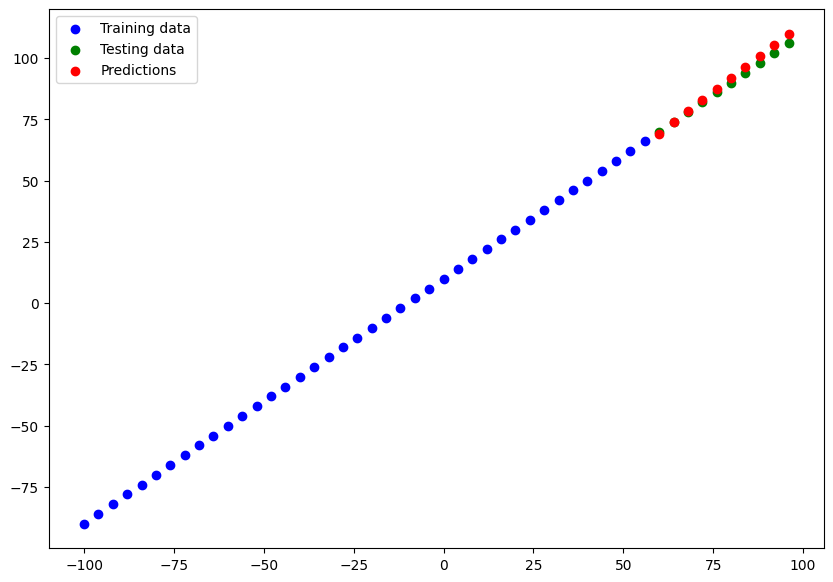

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluate metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7873176336288452>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.766114711761475>)

**Build model_2**

In [ ]:
# Set a random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])

# Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the code
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 26.3993 - mse: 1085.8488
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23.1408 - mse: 763.9926
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 22.1308 - mse: 665.2149
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 18.6422 - mse: 476.5640
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.8188 - mse: 388.5219
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.7568 - mse: 383.1154
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.3136 - mse: 204.0468
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15.1117 - mse: 316.1371
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 15.9291 - mse: 341.9571
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.9786 - mse: 217.7420
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.9746 - mse: 308.0648 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0450 - mse: 192.1817
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


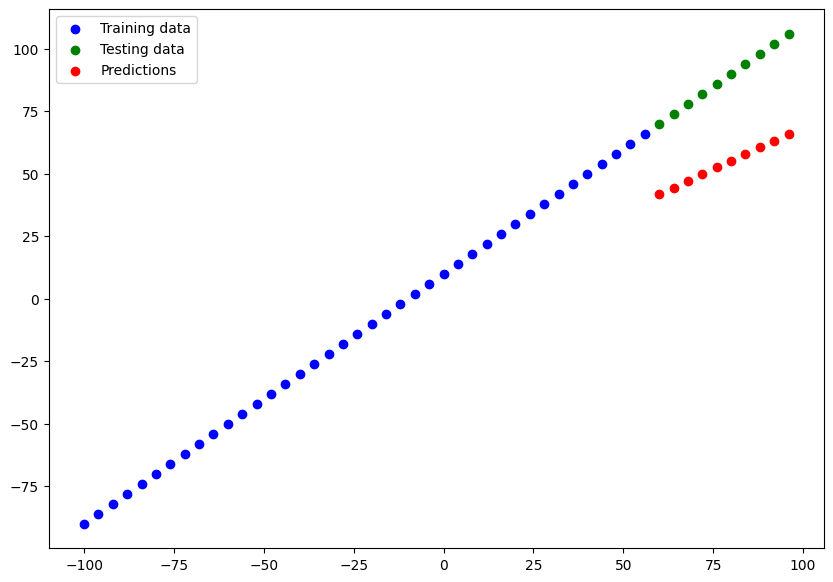

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculationg evaluation matrics for model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=34.13330078125>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1179.4918212890625>)

**Model_3**

In [ ]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Comiling the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 33.0382 - mse: 1554.5807
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 26.1758 - mse: 950.6379
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 24.0585 - mse: 786.0648 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 19.7500 - mse: 530.7108
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17.5790 - mse: 423.7657 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.5174 - mse: 372.4711
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.4464 - mse: 207.3345
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.2501 - mse: 321.3540
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.0085 - mse: 345.2928
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 12.0050 - mse: 218.5577
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 14.9954 - mse: 308.9193
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0443 - mse: 192.2962
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


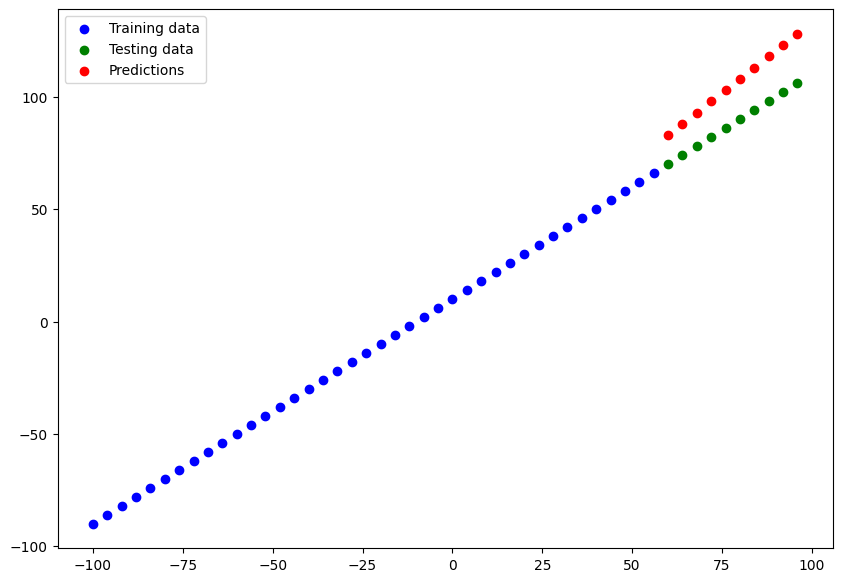

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculationg evaluation matrics for model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=17.533672332763672>,
 <tf.Tensor: shape=(), dtype=float32, numpy=315.9764709472656>)

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1 .numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
result = pd.DataFrame(model_results, columns=["model","mae","mse"])
result

,model,mae,mse
0,model_1,1.787318,4.766115
1,model_2,34.133301,1179.491821
2,model_3,17.533672,315.976471


In [ ]:
model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Note:** One of our main goals should be to minimize the time beween your exoiriments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto:"experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing do, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the tensorflow library to help track modelling experiments
* Weights and Biases - a tool for tracking all of kinds of machine learning experiments.

## Saving our models

Saving our models allows us to use them outsie of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formate we can save our models:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model format
model_2.save("model_2.keras")

In [ ]:
# HDF5 format
model_2.save("model_2_saved.h5")

## Loading the save model

In [ ]:
# Loading the SaveModel
SavedModel_format = tf.keras.models.load_model("/content/model_2.keras")
SavedModel_format.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [ ]:
model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Comparing the result
model_2.predict(X_test) == SavedModel_format.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])